In [10]:
import numpy as np
# количество наблюдений
n = 10
x = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110]) 
y = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])
b = (np.mean(x * y) - np.mean(x) * np.mean(y)) / (np.mean(x**2) - np.mean(x) ** 2)
a = np.mean(y) - b * np.mean(x)
print("a:{}, b:{}".format(a,b))

a:444.1773573243596, b:2.620538882402765


Итак, уравнение регрессии имеет вид (коэффициенты округлены до сотых):
## 𝑦 = 2.62 + 444.178⋅𝑥 
С увеличением зарплаты на 1 тыс. рублей значение скорингового балла возрастет на 444.

Найдем коэффициент корреляции  𝑟  с помощью коэффициента  𝑏  и средних квадратического отклонения, посчитанного для массивов  𝑥  и  𝑦 :

In [5]:
r = b * np.std(x) / np.std(y)
r

0.8874900920739162

Найдем коэффициент детерминации  𝑅2 :

In [6]:
R2 = r**2
R2

0.7876386635293682

Это означает, что 78.8% вариации значение скорингового балла ( 𝑦 ) объясняется вариацией фактора  𝑥  — зарплаты.
С помощью этого уравнения регрессии посчитаем значения, предсказанные моделью значения скорингового балла:

In [7]:
y_pred = a + b * x
y_pred

array([535.89621821, 562.10160703, 942.07974498, 968.2851338 ,
       548.99891262, 627.61507909, 585.68645697, 837.25818968,
       758.64202321, 732.43663439])

Качество модели найдем с помощью средней ошибки аппроксимации  𝐴⎯⎯⎯⎯ :

In [8]:
A_mean = 100 * np.mean(np.abs((y - y_pred) / y))
A_mean

11.46925184356171

Так как  𝐴⎯⎯⎯⎯  равна 11.5%, что превышает 8-10 %, модель плохо описывает эмпирические данные. Для оценки значимости

уравнения регрессии воспользуемся F-критерием Фишера. Найдем фактическое значение  𝐹 -критерия ( 𝐹факт ):

In [11]:
F_fact = (r**2 * (n - 2)) / (1 - r**2)
F_fact

29.671640859664432

При 5 % уровне значимости и степенях свободы  𝑘1=1  и  𝑘2=10−2=8  табличное значение критерия:  𝐹кр=5.3177 .

Так как  𝐹факт=29.67 > 𝐹кр=5.32 , уравнение регрессии статистически значимо.

Для оценки статистической значимости параметров регрессии воспользуемся  𝑡 -статистикой Стьюдента и также рассчитаем

доверительные интервалы каждого из показателей. При  𝑑𝑓=𝑛−2=10−2=8  и  𝛼=0.05  получим

(см. Таблицу критических значений t-критерия Стьюдента):

𝑡кр=2.306 
Определим стандартную ошибку  𝑆ост  (переменная s_residual) и случайные ошибки  𝑚𝑎,𝑚𝑏 :

In [12]:
s_residual = np.sqrt(np.sum((y - y_pred)**2) / (n - 2))
m_a = s_residual * np.sqrt(np.sum(x ** 2)) / (n * np.std(x))
m_b = s_residual / (np.std(x) * np.sqrt(n))

print('s_residual = {}\nm_a = {}\nm_b = {}'.format(s_residual, m_a, m_b))

s_residual = 89.93340731602925
m_a = 56.466497550681524
m_b = 0.48108279568516


Вычислим наблюдаемые значения критерия  𝑡𝑎  и  𝑡𝑏 :

In [13]:
t_a = a / m_a
t_a

7.866210524668864

In [14]:
t_b = b / m_b
t_b

5.447168150485579

Фактические значения t-статистики больше табличного значения:

𝑡𝑎=7.87>𝑡кр=2.306,𝑡𝑏=5.45>𝑡кр=2.306, 
поэтому параметры  𝑎  и  𝑏  не случайно отличаются от нуля, то есть они статистически значимы.

Рассчитаем доверительные интервалы для параметров регрессии  𝑎  и  𝑏 . Для этого определим предельную ошибку для каждого показателя ( Δ𝑎  и  Δ𝑏 ),

используя значение  𝑡кр , равное 2.306 (переменная t_cr):

In [25]:
t_cr = 2.306

In [26]:
delta_a = t_cr * m_a
delta_a

130.2117433518716

In [27]:
delta_b = t_cr * m_b
delta_b

1.109376926849979

Найдем границы доверительных интервалов  𝛾𝑎𝑚𝑖𝑛,𝛾𝑎𝑚𝑎𝑥,𝛾𝑏𝑚𝑖𝑛,𝛾𝑏𝑚𝑎𝑥 :

In [28]:
gamma_a_min = a - delta_a
gamma_a_min

313.965613972488

In [29]:
gamma_a_max = a + delta_a
gamma_a_max

574.3891006762312

In [30]:
gamma_b_min = b - delta_b
gamma_b_min

1.511161955552786

In [31]:
gamma_b_max = b + delta_b
gamma_b_max

3.729915809252744

Приходим к выводу о том, что с вероятностью  𝑝=1−𝛼=0.95  параметры  𝑎  и  𝑏 , находясь в указанных границах,

являются статистически значимыми и отличны от нуля. Поместим исходные и предсказанные данные в датафрейм df:

In [32]:
import pandas as pd

df = pd.DataFrame({'x': x, 'y': y, 'y_pred': y_pred}, columns=['x', 'y', 'y_pred'])
df

,x,y,y_pred
0,35,401,535.896218
1,45,574,562.101607
2,190,874,942.079745
3,200,919,968.285134
4,40,459,548.998913
5,70,739,627.615079
6,54,653,585.686457
7,150,902,837.258190
8,120,746,758.642023
9,110,832,732.436634


Отсортируем значения по полю x:

In [33]:
df = df.sort_values('x')
df

,x,y,y_pred
0,35,401,535.896218
4,40,459,548.998913
1,45,574,562.101607
6,54,653,585.686457
5,70,739,627.615079
9,110,832,732.436634
8,120,746,758.642023
7,150,902,837.258190
2,190,874,942.079745
3,200,919,968.285134


Построим на одном графике исходные данные и теоретическую прямую, построенную по уравнению регрессии:

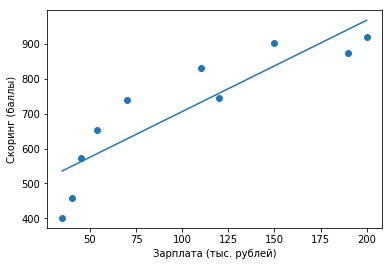

In [35]:
import matplotlib.pyplot as plt

plt.scatter(df['x'], df['y'])
plt.plot(df['x'], df['y_pred'])
plt.xlabel('Зарплата (тыс. рублей)')
plt.ylabel('Скоринг (баллы)')
plt.show()

2. Посчитать коэффициент линейной регрессии при заработной плате (zp), используя градиентный спуск (без intercept).


In [120]:
def mse_(w1, y=y[0], x=x[1]):
#     n = y.shape
    n=10
    err = np.sum((y - y_pred)**2)/n
    return err

In [121]:
x = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110]) 
y = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

x = x.T
y = y.T

In [164]:
w1 = 0.1
alpha = 1*1e-7
for i in range (1000):
    y_pred = w1*x
    w1 -= alpha * (2/n) * np.sum((y_pred - y) * x)
    if (i%10 == 0) & (i < 300):
        print('i={}, w1={}, mse = {}'.format(i, w1, mse_(w1)))

i=0, w1=0.115952808, mse = 152806.48599999998
i=10, w1=0.2730832315080305, mse = 140769.0612716897
i=20, w1=0.4259374970487512, mse = 129715.6054344105
i=30, w1=0.5746319762741513, mse = 119584.10118554549
i=40, w1=0.7192798738902163, mse = 110316.11088760686
i=50, w1=0.8599913138424097, mse = 101856.57757836519
i=60, w1=0.9968734231556994, mse = 94153.63684948569
i=70, w1=1.1300304134929542, mse = 87158.4390051268
i=80, w1=1.2595636604938043, mse = 80824.98094369259
i=90, w1=1.3855717809543708, mse = 75109.9472359553
i=100, w1=1.508150707906618, mse = 69972.55990117858
i=110, w1=1.627393763654494, mse = 65374.436409751535
i=120, w1=1.7433917308224578, mse = 61279.45546628265
i=130, w1=1.8562329214704902, mse = 57653.63015116693
i=140, w1=1.9660032443282016, mse = 54464.988021413235
i=150, w1=2.072786270199228, mse = 51683.45779306338
i=160, w1=2.176663295585704, mse = 49280.76224792131
i=170, w1=2.2777134045812613, mse = 47230.31702659891
i=180, w1=2.376013529079662, mse = 45507.13498

In [165]:
w1=2.9931514888687207


In [166]:
f = 1/n * np.sum((w1*x - y)**2)
f

172112.05063215055

In [167]:
f_p = 1/n * np.sum(2*(w1*x - y)*x)
f_p

-79812.49839690237

3. В каких случаях для вычисления доверительных интервалов и проверки статистических гипотез используется таблица значений функции Лапласа, 
а в каких - таблица критических точек распределения Стьюдента?

Для вычисления доверительных интервалов и проверки статистических гипотез используется:
Когда измерений менее 30 - используется таблица критических точек распределения Стьюдента, 
таблица значений функции Лапласа - когда известно матожидание и дисперсия.

*4. Произвести вычисления как в пункте 2, но с вычислением intercept. Учесть, что изменение коэффициентов должно производиться
на каждом шаге одновременно (то есть изменение одного коэффициента не должно влиять на изменение другого во время одной итерации).

In [104]:
def mse2(y, y_pred):
    n = y.shape
    err = np.sum((y - y_pred)**2)/n
    return err

In [105]:
x = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110]) 
y = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

x = x.reshape(1,10)
x = np.vstack([np.ones((1,10)),x])
y = y.T

In [111]:
W = np.array([[0.1, 0.1]])
alpha = 5*1e-5
for i in range (1500000):
    y_pred = np.dot(W,x)

    W[0,0] -= alpha * (2/n) * np.sum((y_pred - y))
    W[0,1] -= alpha * (2/n) * np.sum((y_pred - y) * x[1])
    if i%150000 == 0:
        print('i={}, w0={}, w1={}, mse = {}'.format(i, W[0,0], W[0,1], mse2(y,y_pred)))

i=0, w0=0.169966, w1=8.07539, mse = [518196.384]
i=150000, w0=434.29193010045395, w1=2.693299997369148, mse = [6495.20401777]
i=300000, w0=443.9572751113981, w1=2.622158784794098, mse = [6470.42648836]
i=450000, w0=444.1724575684502, w1=2.6205749467725648, mse = [6470.41420727]
i=600000, w0=444.17724823962794, w1=2.6205396853146192, mse = [6470.41420118]
i=750000, w0=444.17735489577376, w1=2.620538900278231, mse = [6470.41420118]
i=900000, w0=444.17735727028435, w1=2.620538882800783, mse = [6470.41420118]
i=1050000, w0=444.1773573232393, w1=2.620538882411011, mse = [6470.41420118]
i=1200000, w0=444.1773573232393, w1=2.620538882411011, mse = [6470.41420118]
i=1350000, w0=444.1773573232393, w1=2.620538882411011, mse = [6470.41420118]


w0=444.1773573232393, w1=2.620538882411011